In [2]:
try:
    import altair as alt
except ModuleNotFoundError:
    !conda install -c conda-forge altair vega -y
    import altair as alt

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.8
  latest version: 4.5.11

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs: 
    - altair
    - vega


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    qtconsole-4.4.1            |           py36_1         156 KB  conda-forge
    certifi-2018.8.24          |        py36_1001         139 KB  conda-forge
    pyqt-5.6.0                 |   py36h8210e8a_7         5.4 MB  conda-forge
    qt-5.6.3                   |       h39df351_0        44.6 MB  defaults
    vega-1.4.0                 |           py36_1         1.6 MB  conda-forge
    jupyter-1.0.0              |             py_1           6 KB  conda-forge
    altair-2.2.2               |           py36_1         461 KB  conda-forge
    jupy

In [3]:
df = alt.pd.read_csv("../data/processed/part_of_speech_total.csv")


artista = {
    'Tijoux': "Ana Tijoux", 
    'LilSupa': "Lil Supa", 
    'VicoC': "Vico C", 
    'Akapellah': "Akapellah", 
    'Tego': "Tego Calderón", 
    'Canserbero': "Canserbero",
    'Residente': "Residente",
}

df['artista'] = df['artista'].map(artista)

df.head()

,artista,pos,cuenta
0,Ana Tijoux,sustantivo,638
1,Ana Tijoux,verbo,453
2,Ana Tijoux,nombre propio,337
3,Ana Tijoux,adjetivo,174
4,Ana Tijoux,pronombre,86


In [10]:
df['share'] = df.groupby('artista')[['cuenta']].apply(lambda x: x/x.sum())

df.head(14)

,artista,pos,cuenta,share
0,Ana Tijoux,sustantivo,638,0.310010
1,Ana Tijoux,verbo,453,0.220117
2,Ana Tijoux,nombre propio,337,0.163751
3,Ana Tijoux,adjetivo,174,0.084548
4,Ana Tijoux,pronombre,86,0.041788
5,Ana Tijoux,determinador,83,0.040330
6,Ana Tijoux,adverbio,72,0.034985
7,Ana Tijoux,adposición,59,0.028669
8,Ana Tijoux,conj. subordinada,53,0.025753
9,Ana Tijoux,auxiliar,46,0.022352


In [11]:
%run theme.py

In [12]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ubuntu|Ubuntu+Condensed|Ubuntu+Mono');
</style>

In [13]:
condition = (
    (df['pos'] == 'adjetivo') | 
    (df['pos'] == 'nombre propio') | 
    (df['pos'] == 'sustantivo') | 
    (df['pos'] == 'verbo') | 
    (df['pos'] == 'adverbio') |
    (df['pos'] == 'verbo') 
)
dff = df[condition].copy()

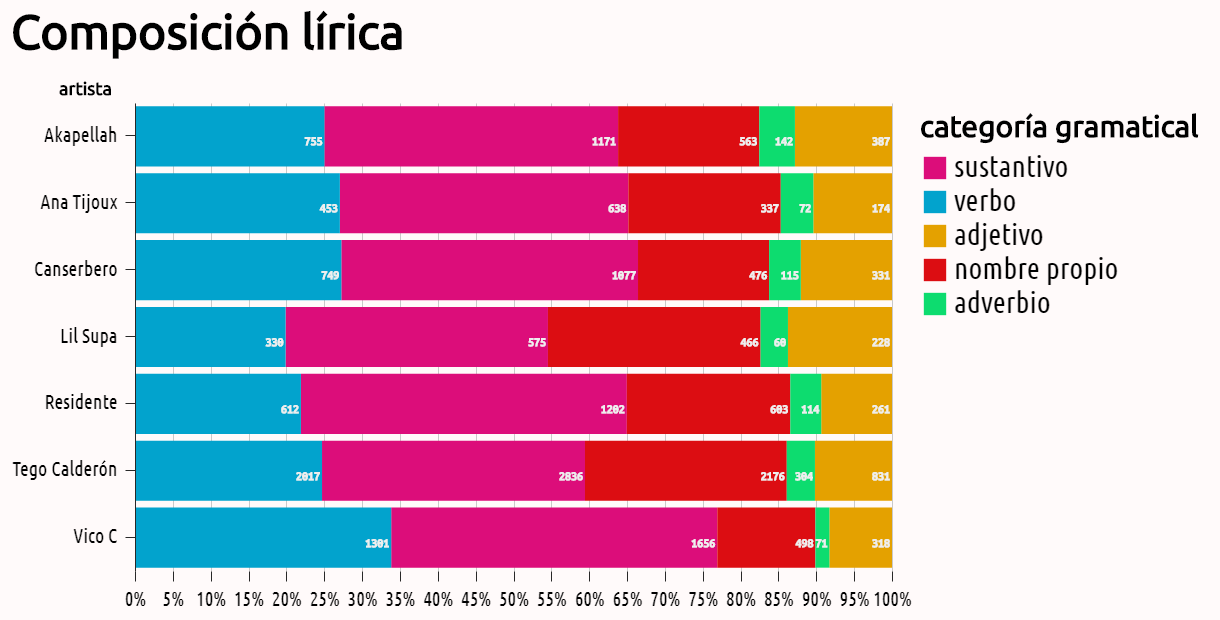

In [14]:
bar = alt.Chart(dff).mark_bar().encode(
    x = alt.X('cuenta:Q', stack = 'normalize', axis = alt.Axis(format = '%'), sort = ['sustantivo', 'verbo', 'adjetivo', 'nombre propio', 'adverbio', 'pronombre']),
    y = alt.Y('artista:N'),
    color = alt.Color("pos:N", legend = alt.Legend(title = "categoría gramatical"), sort = ['sustantivo', 'verbo', 'adjetivo', 'nombre propio', 'adverbio', 'pronombre'])
).properties(
    title = "Composición lírica",
    width = 1200,
    height = 600,
)

text = bar.mark_text(
    align='right',
    baseline='top',
    dx= -2,
    stroke = "#EEE",
    fontWeight = 100,
    fontSize = 12,
).encode(
    text='cuenta'
)

final = bar + text
final = final.configure_axisLeft(
    titleY= -5, 
    titleAngle = 0, 
    titleX = -50
).configure_title(
    fontSize = 48
).configure_legend(
    titleLimit = 500,
)

final

In [15]:
df['artista'].unique()

array(['Ana Tijoux', 'Lil Supa', 'Vico C', 'Akapellah', 'Tego Calderón',
       'Canserbero', 'Residente'], dtype=object)

In [18]:
import os

In [19]:
nombre = "../data/processed/VicoC-top150.csv"
data = alt.pd.read_csv(nombre)

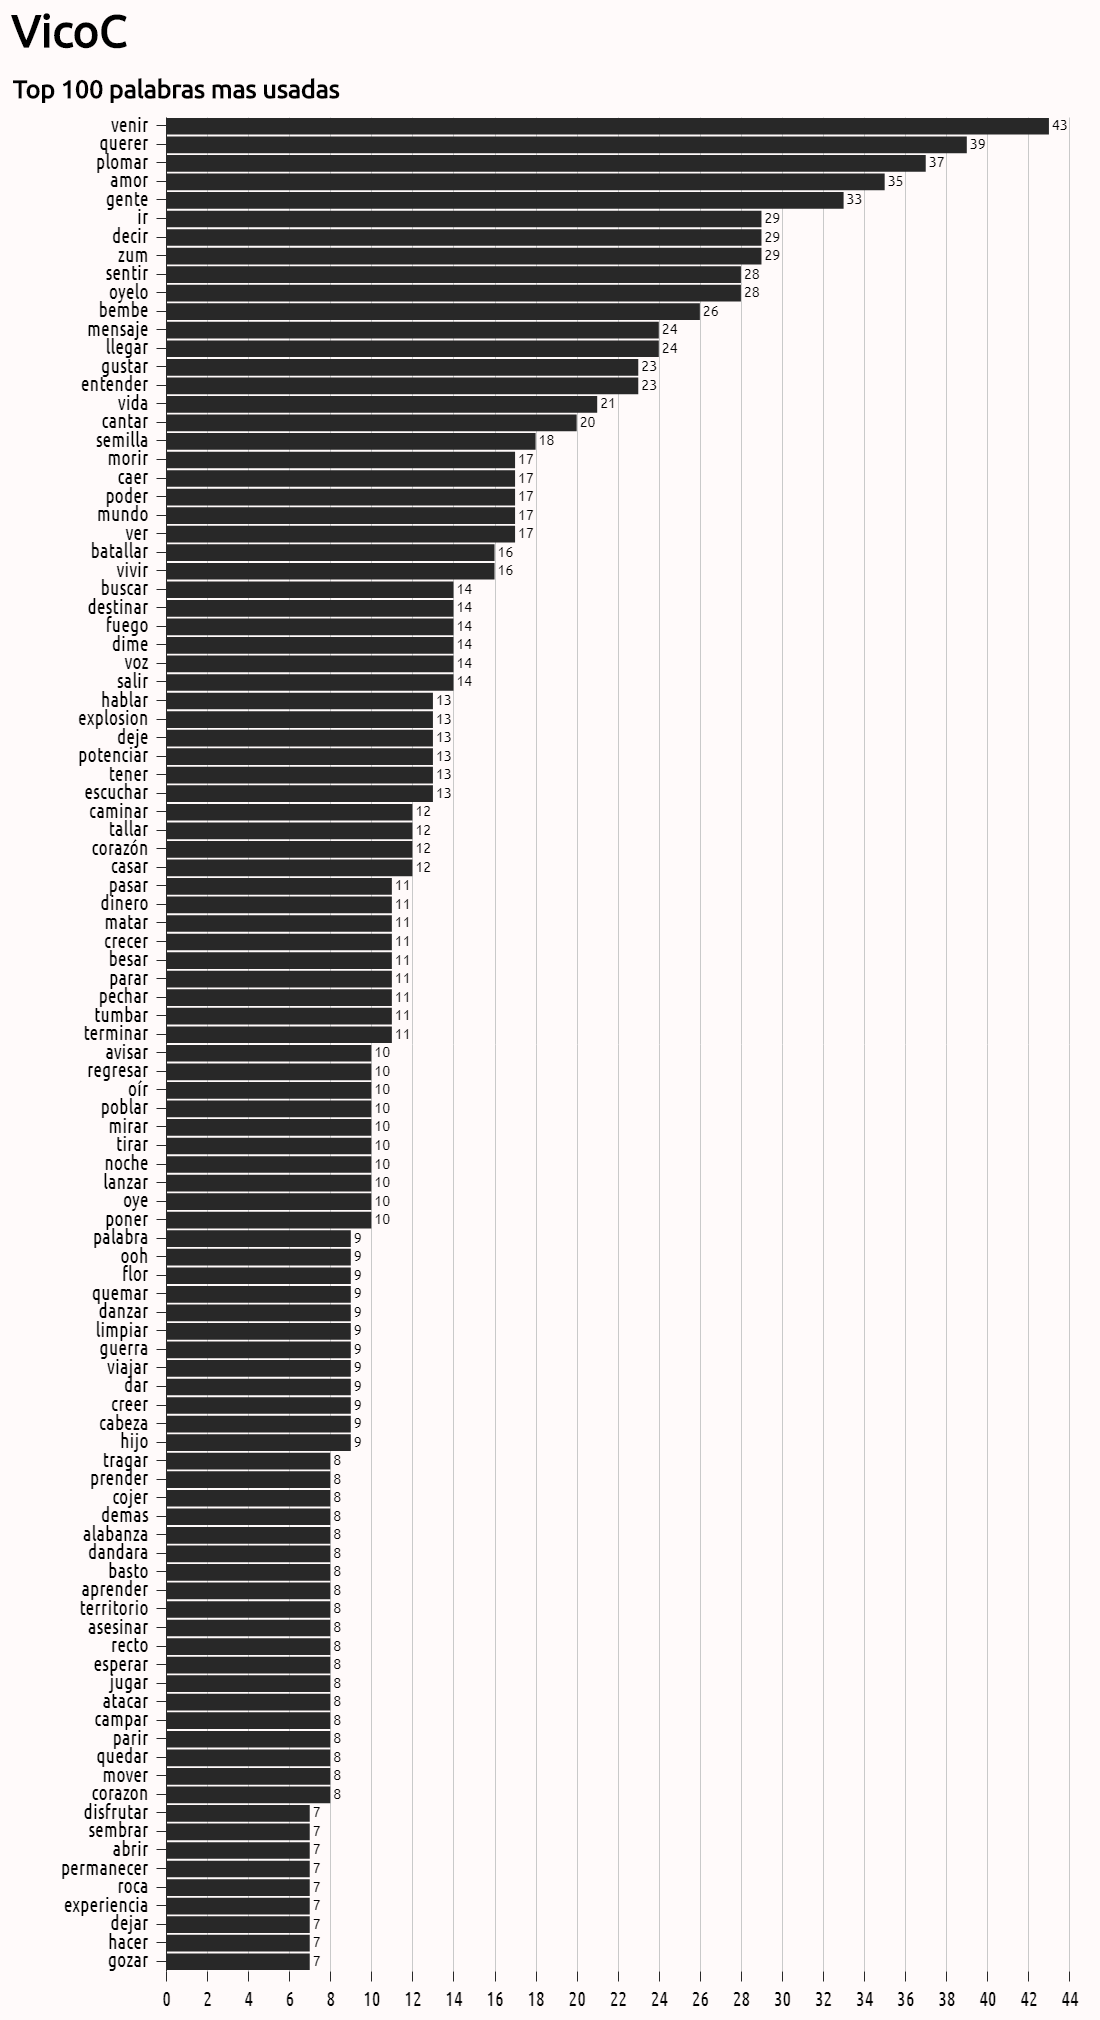

In [20]:
data.sort_values('cuenta', ascending = False, inplace = True)
title = os.path.basename(nombre).split("-")[0]
chart25 = alt.Chart(data.iloc[:100]).mark_bar().encode(
    x = alt.X('cuenta:Q', sort = 'ascending'),
    y = alt.Y('palabra:N', scale = alt.Scale(domain = list(data.iloc[:100]['palabra'])), axis = alt.Axis(title = "Top 100 palabras mas usadas")),
).properties(
    title = f"{title}",
    height = 2000
)

text25 = chart25.mark_text(
    align='left',
    baseline='middle',
    dx=3,
    fontSize = 14,
    font = 'Ubuntu'
).encode(
    text='cuenta'
)

final_25 = chart25 + text25

final_25.configure_axisLeft(titleAngle= 0, titleY = -15, titleX = 10, titleFontSize=25).configure_title(fontSize = 45)

*** 
Composición lírica remix

In [126]:
%run theme.py

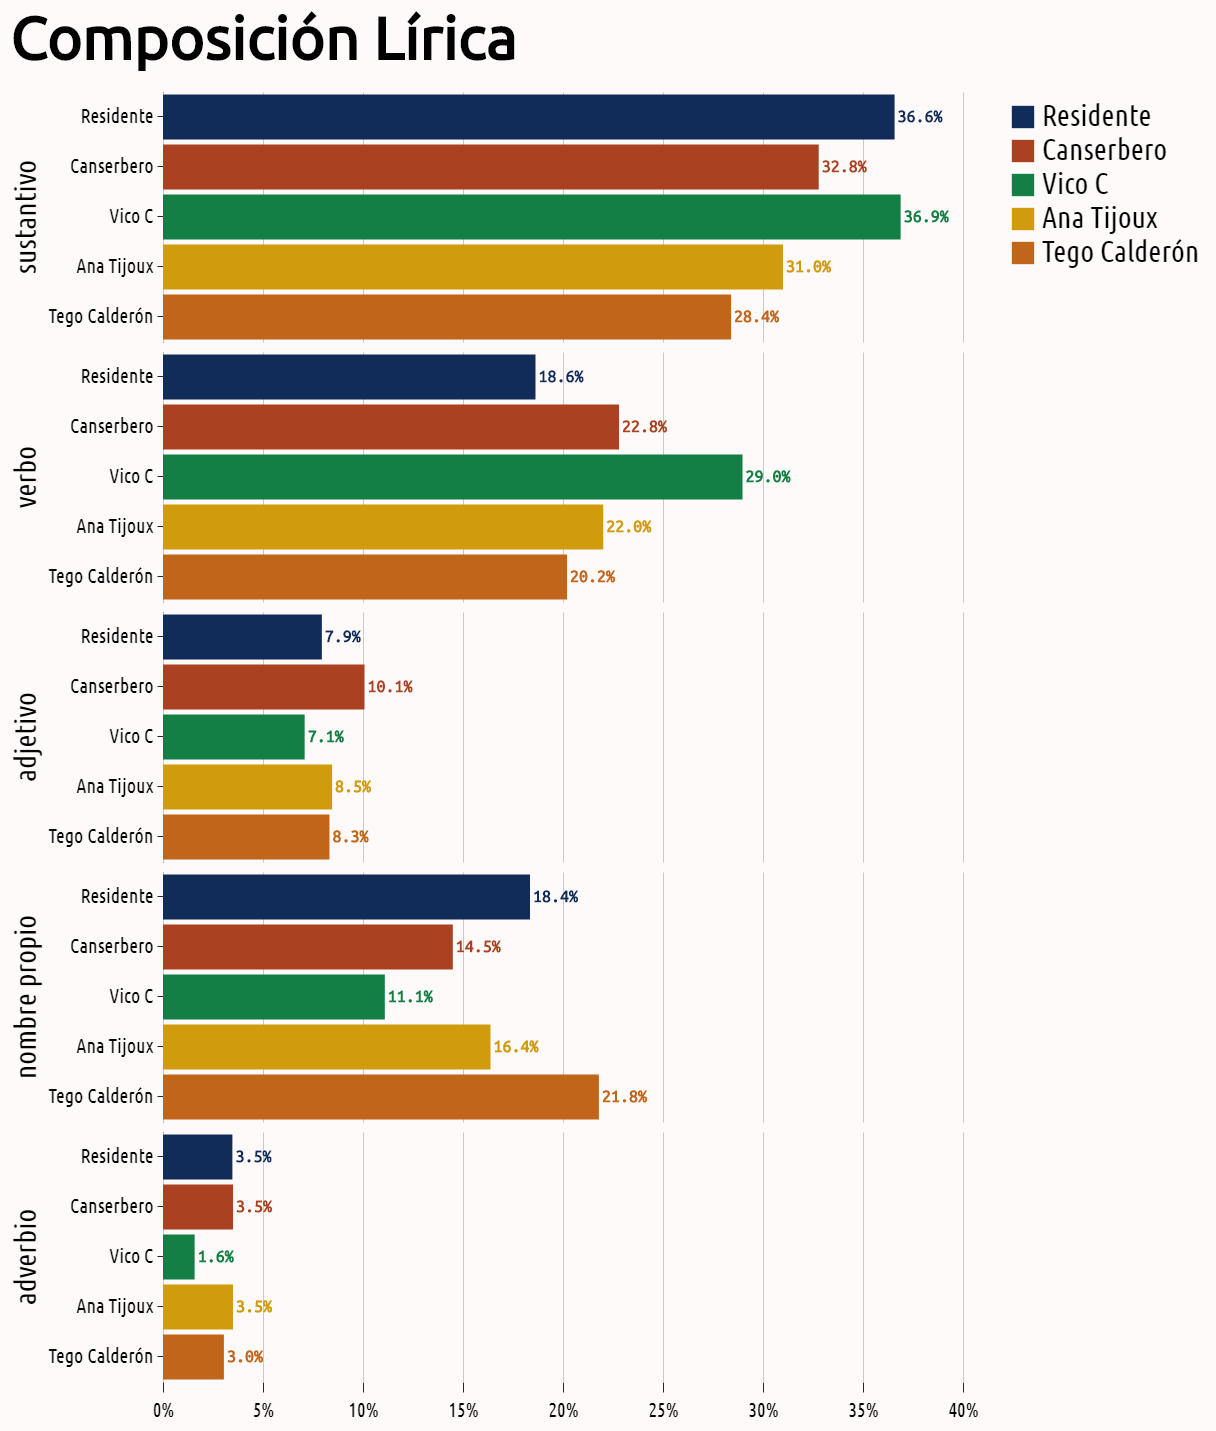

In [128]:
dff = dff[(dff['artista'] != 'Akapellah') & (dff['artista'] != 'Lil Supa')]

orden = ['sustantivo', 'verbo', 'adjetivo', 'nombre propio', 'adverbio', 'pronombre']
escala = alt.Scale(
    domain =['Residente','Canserbero', 'Vico C', 'Ana Tijoux', 'Tego Calderón',], 
    range = ["#112c59", "#aa4221", "#147f44", "#d19b0e", "#c1651b"]
)

barras = alt.Chart().mark_bar().encode(
    x = alt.X('share:Q', axis = alt.Axis(format = '%'), sort = orden),
    y = alt.Y('artista:N', sort = ['Residente','Canserbero', 'Vico C', 'Ana Tijoux', 'Tego Calderón'], axis = alt.Axis(title = "")),
    color = alt.Color("artista:N", legend = alt.Legend(title = ""), sort = ['Residente','Canserbero', 'Vico C', 'Ana Tijoux', 'Tego Calderón'], scale = escala),
).properties(
    width = 800,
    height = 250,
)

etiquetas = barras.mark_text(
    align='left',
    baseline='middle',
    dx=3,
    fontWeight = 800,
    fontSize = 18,
).encode(
    text= alt.Text('share:Q', format = ".1%")
)

final_barras = alt.layer(barras, etiquetas, data = dff).facet(
    row = alt.Row('pos:N', sort = orden, title = "", ),
)

final_barras = final_barras.properties(title = 'Composición Lírica').configure_title(fontSize = 60)
final_barras